# Car Accident Severity Report

## Applied Data Science Capstone - IBM/Coursera

# Table of Contents
 ## - Introduction and Data Analysis
 ## - Data Review
 ## - Methodology
 ## - Results & Evaluation
 ## - Discussion
 ## - Conclusion

## Data Analysis

The data to be used is the one proposed with 252,861 car accidents with the categorization of severity, location and other factors that will guide us for the severity identification of each car accident. Hence dependent variable will be SEVERITYCODE.



In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [49]:
#Importing Dataset
filepath=r'C:\Users\abel.fernandez.alva1\Desktop\car_severity.csv'
df=pd.read_csv(filepath,low_memory=False)
df.head

<bound method NDFrame.head of         SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  1 -122.334540  47.607871         3   26700      26700   
3                  1 -122.334803  47.604803         4    1144       1144   
4                  2 -122.306426  47.545739         5   17700      17700   
5                  1 -122.387598  47.690575         6  320840     322340   
6                  1 -122.338485  47.618534         7   83300      83300   
7                  2 -122.320780  47.614076         9  330897     332397   
8                  1 -122.335930  47.611904        10   63400      63400   
9                  2 -122.384700  47.528475        12   58600      58600   
10                 1         NaN        NaN        14   48900      48900   
11                 1 -122.333831  47.547371        15   38

In [50]:
df.info

<bound method DataFrame.info of         SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  1 -122.334540  47.607871         3   26700      26700   
3                  1 -122.334803  47.604803         4    1144       1144   
4                  2 -122.306426  47.545739         5   17700      17700   
5                  1 -122.387598  47.690575         6  320840     322340   
6                  1 -122.338485  47.618534         7   83300      83300   
7                  2 -122.320780  47.614076         9  330897     332397   
8                  1 -122.335930  47.611904        10   63400      63400   
9                  2 -122.384700  47.528475        12   58600      58600   
10                 1         NaN        NaN        14   48900      48900   
11                 1 -122.333831  47.547371        15   

In [51]:
#Unique values per column
df.nunique()

SEVERITYCODE           2
X                  23563
Y                  23839
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194670
STATUS                 2
ADDRTYPE               3
INTKEY              7614
LOCATION           24102
EXCEPTRSNCODE          2
EXCEPTRSNDESC          1
SEVERITYCODE.1         2
SEVERITYDESC           2
COLLISIONTYPE         10
PERSONCOUNT           47
PEDCOUNT               7
PEDCYLCOUNT            3
VEHCOUNT              13
INCDATE             5985
INCDTTM           162058
JUNCTIONTYPE           7
SDOT_COLCODE          39
SDOT_COLDESC          39
INATTENTIONIND         1
UNDERINFL              4
WEATHER               11
ROADCOND               9
LIGHTCOND              9
PEDROWNOTGRNT          1
SDOTCOLNUM        114932
SPEEDING               1
ST_COLCODE            63
ST_COLDESC            62
SEGLANEKEY          1955
CROSSWALKKEY        2198
HITPARKEDCAR           2
dtype: int64

In [52]:
#Missing Values, so we can identify how many are unknown, in order
missing_values=df.isna().sum()
count=df.count()
missing_values/count


SEVERITYCODE       0.000000
X                  0.028172
Y                  0.028172
OBJECTID           0.000000
INCKEY             0.000000
COLDETKEY          0.000000
REPORTNO           0.000000
STATUS             0.000000
ADDRTYPE           0.009992
INTKEY             1.991747
LOCATION           0.013943
EXCEPTRSNCODE      1.295374
EXCEPTRSNDESC     33.528734
SEVERITYCODE.1     0.000000
SEVERITYDESC       0.000000
COLLISIONTYPE      0.025842
PERSONCOUNT        0.000000
PEDCOUNT           0.000000
PEDCYLCOUNT        0.000000
VEHCOUNT           0.000000
INCDATE            0.000000
INCDTTM            0.000000
JUNCTIONTYPE       0.033603
SDOT_COLCODE       0.000000
SDOT_COLDESC       0.000000
INATTENTIONIND     5.531555
UNDERINFL          0.025734
WEATHER            0.026800
ROADCOND           0.026426
LIGHTCOND          0.027282
PEDROWNOTGRNT     40.712663
SDOTCOLNUM         0.693751
SPEEDING          19.858566
ST_COLCODE         0.000092
ST_COLDESC         0.025842
SEGLANEKEY         0

In [53]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


Text(0.5, 1.05, 'Correlation Matrix')

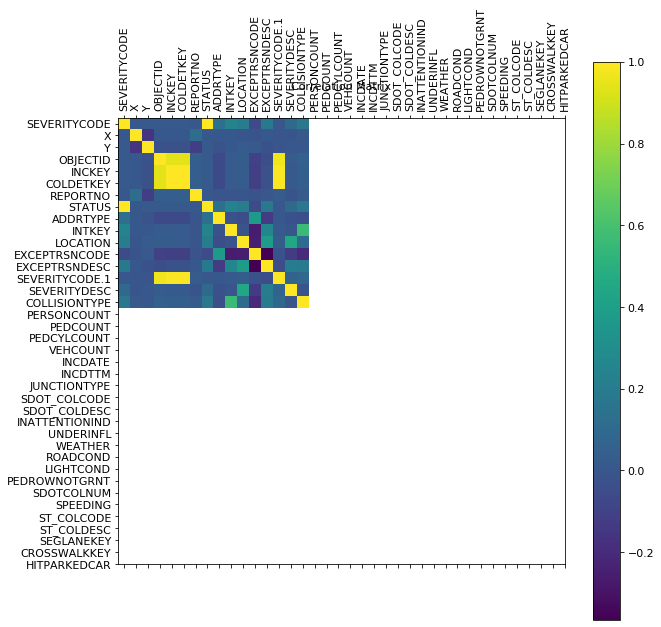

In [54]:
corr = df.corr()
#corr.style.background_gradient(cmap='coolwarm')
f = plt.figure(figsize=(10, 10))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=11, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=11)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=11)
plt.title('Correlation Matrix', fontsize=11)



In [58]:

selected_cols = df[["SEVERITYCODE","ROADCOND","LIGHTCOND","WEATHER"]]


In [59]:
selected_cols.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
0,2,Wet,Daylight,Overcast
1,1,Wet,Dark - Street Lights On,Raining
2,1,Dry,Daylight,Overcast
3,1,Dry,Daylight,Clear
4,2,Wet,Daylight,Raining


In [83]:
#We label the light conditions on numerical values
selected_cols["LIGHTCOND"].replace("Daylight", 0, inplace=True)
selected_cols["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
selected_cols["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
selected_cols["LIGHTCOND"].replace("Dusk", 1, inplace=True)
selected_cols["LIGHTCOND"].replace("Dawn", 1, inplace=True)
selected_cols["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
selected_cols["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
selected_cols["LIGHTCOND"].replace("Other",3, inplace=True)
selected_cols["LIGHTCOND"].replace("Unknown",3, inplace=True)

#THe same for the weather conditions
selected_cols["WEATHER"].replace("Clear", 0, inplace=True)
selected_cols["WEATHER"].replace("Raining", 3, inplace=True)
selected_cols["WEATHER"].replace("Overcast", 1, inplace=True)
selected_cols["WEATHER"].replace("Other", 4, inplace=True)
selected_cols["WEATHER"].replace("Snowing", 3, inplace=True)
selected_cols["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
selected_cols["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
selected_cols["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
selected_cols["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
selected_cols["WEATHER"].replace("Partly Cloudy", 1, inplace=True)
selected_cols["WEATHER"].replace("Unknown", 4, inplace=True)


#The same for road conditions

selected_cols["ROADCOND"].replace("Dry", 0, inplace=True)
selected_cols["ROADCOND"].replace("Wet", 2, inplace=True)
selected_cols["ROADCOND"].replace("Ice", 2, inplace=True)
selected_cols["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
selected_cols["ROADCOND"].replace("Other", 3, inplace=True)
selected_cols["ROADCOND"].replace("Unknown", 3, inplace=True)
selected_cols["ROADCOND"].replace("Standing Water", 2, inplace=True)
selected_cols["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
selected_cols["ROADCOND"].replace("Oil", 2, inplace=True)

C:\Users\abel.fernandez.alva1\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [101]:
select=selected_cols.dropna()

# Data Review
When reviewing the data we can encounter that Severity code has a  vast majority of data for one type which can affect our prediction. A downsize is needed in order to ensure any bias.

In [137]:
select["SEVERITYCODE"].value_counts()

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

Class 0: 132285
Class 1: 57052
Proportion: 2.32 : 1


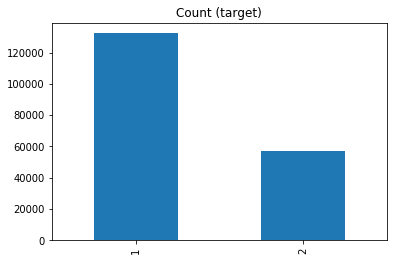

In [140]:
target_df = select["SEVERITYCODE"].value_counts()
print('Class 0:', target_df[1])
print('Class 1:', target_df[2])
print('Proportion:', round(target_df[1] / target_df[2], 2), ': 1')

target_df.plot(kind='bar', title='Count (target)')

In [164]:
#Downsample the majority class
from sklearn.utils import resample
# Seperate majority and minority classes
colData_majority = select[select.SEVERITYCODE==1]
colData_minority = select[select.SEVERITYCODE==2]

#Downsample majority class
colData_majority_downsampled = resample(colData_majority,
                                        replace=False,
                                        n_samples=58188,
                                        random_state=123)

# Combine minority class with downsampled majority class
colData_balanced = pd.concat([colData_majority_downsampled, colData_minority])

# Display new class counts
colData_balanced.SEVERITYCODE.value_counts()

1    58188
2    57052
Name: SEVERITYCODE, dtype: int64

# Methodology 
With the Data ready, we can start sampling the data for its review using the following methods:

## K-Nearest Neighbor (KNN)
From the data, it will help us predict the severity code depending on the data near it.

## Decision Tree
A decision tree model gives us a layout of all possible outcomes so we can fully analyze the consequences of a decision. It context, the decision tree observes all possible outcomes of different weather conditions.

## Logistic Regression
Due to the binarity of the nature of our variable SEVERITYCODE, the model will only predict one of those two classes. This makes our data binary, which is suitable to use with logistic regression.

In [166]:
#Creation of the data sets
X=select[["ROADCOND","WEATHER","LIGHTCOND"]].values
y=select[["SEVERITYCODE"]].values

In [167]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.14, -0.02, -0.65],
       [ 1.14,  1.37,  0.54],
       [-0.7 , -0.02, -0.65],
       [-0.7 , -0.72, -0.65],
       [ 1.14,  1.37, -0.65]])

In [168]:
#Test/Train split (30 train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (132535, 3) (132535, 1)
Test set: (56802, 3) (56802, 1)


# K- Nearest Neighbors

In [169]:
#K-Nearest Neighbors method
from sklearn.neighbors import KNeighborsClassifier

k = 25

In [170]:
#Train model and predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

Kyhat = neigh.predict(X_test)
Kyhat[0:5]

C:\Users\abel.fernandez.alva1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([1, 1, 1, 1, 1], dtype=int64)

# Decision Tree

In [171]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
colDataTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
colDataTree
colDataTree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [175]:
# Train Model & Predict
DTyhat = colDataTree.predict(X_test)
print (y_test [0:5])

[[1]
 [1]
 [1]
 [1]
 [2]]


# LOGISTIC REGRESSION

In [176]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)
LR

C:\Users\abel.fernandez.alva1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [177]:

# Train Model & Predicr
LRyhat = LR.predict(X_test)
LRyhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [178]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.64, 0.36],
       [0.89, 0.11],
       [0.76, 0.24],
       ...,
       [0.67, 0.33],
       [0.75, 0.25],
       [0.86, 0.14]])

# Review Results final

In [180]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


# K-Nearest Neighbors

In [183]:
 
# Jaccard Similarity Score
jaccard_similarity_score(y_test, Kyhat)


C:\Users\abel.fernandez.alva1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6985141368261681

In [184]:
# F1-SCORE
f1_score(y_test, Kyhat, average='macro')

0.4112501166056863

# Decision Tree

In [185]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, DTyhat)

C:\Users\abel.fernandez.alva1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6985141368261681

In [186]:
# F1-SCORE
f1_score(y_test, DTyhat, average='macro')

0.4112501166056863

# Logistic Regression

In [187]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, LRyhat)

C:\Users\abel.fernandez.alva1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6985141368261681

In [188]:
# F1-SCORE
f1_score(y_test, LRyhat, average='macro')

0.4112501166056863

In [189]:
# LOGLOSS
yhat_prob = LR.predict_proba(X_test)
log_loss(y_test, yhat_prob)

0.5990960616849885

# Discussion

As can be seen, data cleansing in order to work with it is critical. In a data sample where the majority was categorical and not simple to work with, it neede an important part to work with.

After that, and trying to balance the data for the SEVERITYCODE variable, which at the end is the variable that we are trying to predict (dependant), then we could work with the 3 models that have been the core of the study during these weeks: K-Nearest Neighbor, Decision Tree and Logistic Regression.

From all the models, due to the nature of the binary data of the SEVERITYCODE, logistic regression is the most appropriate to work with.

Evaluation metrics used to test the accuracy of our models were jaccard index, f-1 score and logloss for logistic regression. Choosing different k, max depth and hyperamater C values helped to improve our accuracy to be the best possible.


# Conclusion
Based on historical data from weather conditions pointing to certain classes, we can conclude that particular weather conditions have a somewhat impact on whether or not travel could result in property damage (class 1) or injury (class 2).